# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

In [2]:
def load_data(file):
    """
    Loads the dataset from a pickle file and returns a dataset
    """
    
    with open(file, mode='rb') as f:
        data = None
        data = pickle.load(f)
    return data['features'], data['labels']

In [3]:
def save_data(file, features, labels):
    """
    Saves the dataset given its features and labels in a pickle file
    """
    
    print("\nSaving Data...")
    data = {}
    data['features'] = features
    data['labels'] = labels
    try:
        with open(file, mode='wb') as f:
            pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)  
    except Exception as e:
        print("Saving exception error on:", file, ":", e)
        raise
    print("\nSaved Data!")

In [4]:
X_train, y_train = load_data(training_file)
X_valid, y_valid = load_data(validation_file)
X_test, y_test   = load_data(testing_file)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

I used numpy library to calculate summary statistics of the traffic signs data set:

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
imshape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", imshape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the dataset

First of all we include the necessary libraries to explore the dataset. We use `pandas`, `numpy` and `csv` to explore the contents of the data set and the labes. For the visualization we use parts of `matplotlib`

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv
import pandas as pd
import warnings
import numpy as np

%matplotlib inline


We create a dictionary that includes the index of the label from 0 to 42 and the corresponding label name which can be found in `signnames.csv` file provided with the exercise.

In [7]:
# Making a dictionary with the label numbers and strings from csv file
label = {}
with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)
    for row in reader:
        label[int(row[0])] = row[1]

We define a helper function show images which displays an *example* image for each **label** of the data set...

In [8]:
def show_images(feature_set, label_set):
    """
    Function given the feature_set and label_set prints for each label an image
    """

    plt.figure(figsize=(32,32))
    for i in range(n_classes):
        plt.subplot(n_classes//4+1,4,i+1)
        img_class = feature_set[np.where(label_set == i)]
        #if img_class[0].ndim > 2:
        plt.imshow(img_class[0])
        #else:
        #    plt.imshow(img_class[0], cmap = 'gray')
        plt.title(label[i])
        plt.axis('off')
    plt.show()
    

...and we call it!

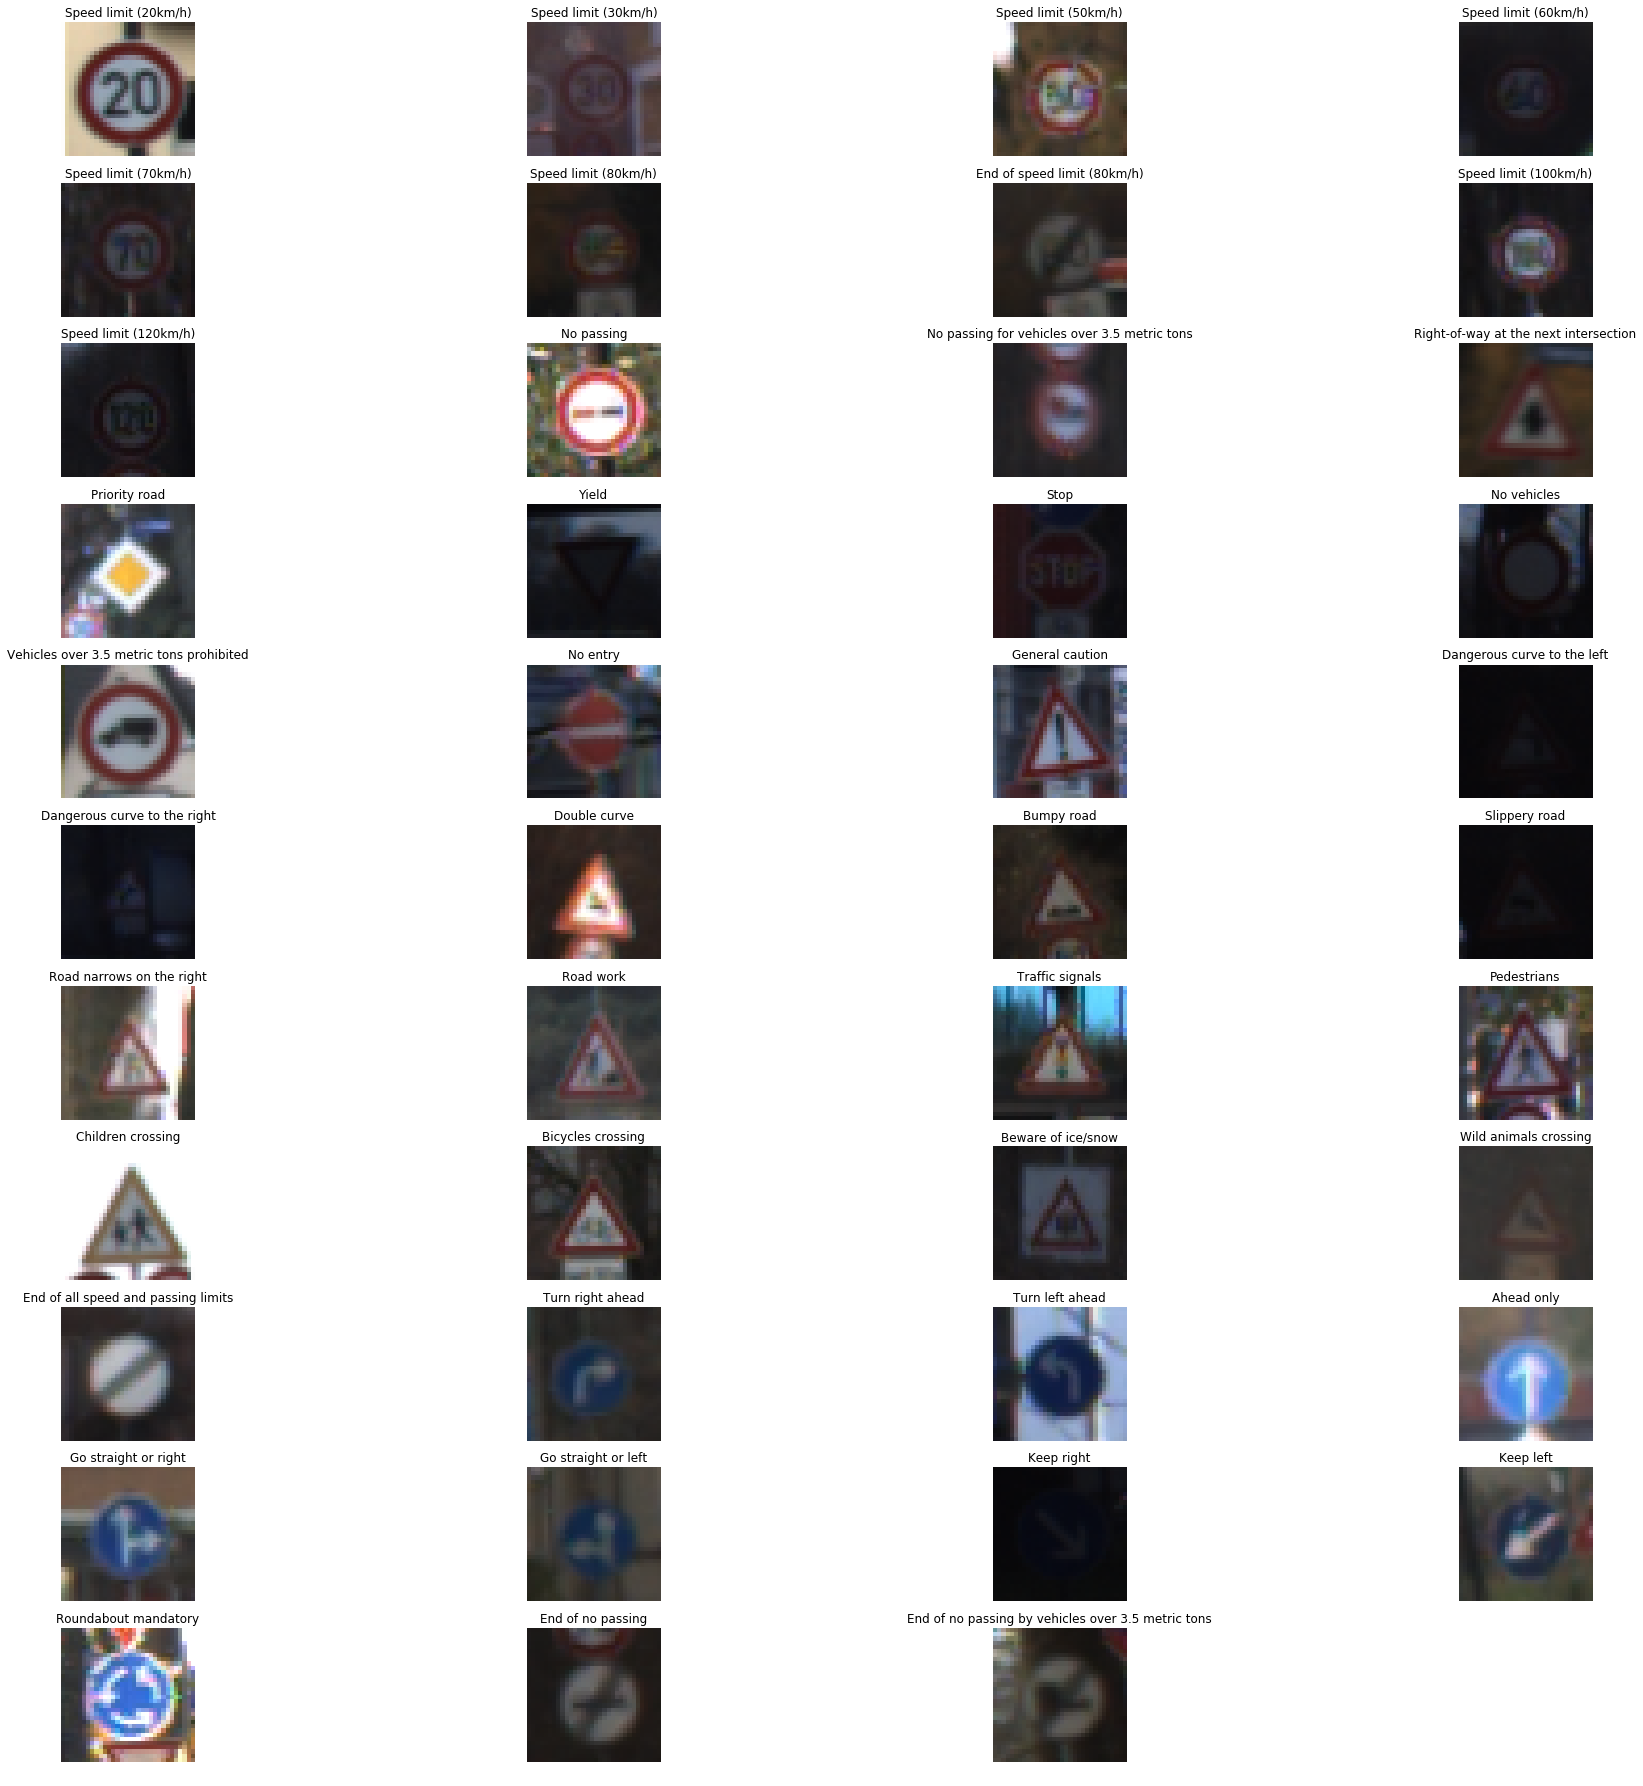

In [9]:
show_images(X_train, y_train)

### Examining the distribution

There are 43 individual classes in our dataset. Below we are going to build up a merged histogram which includes the information of how many images there are in <span style="color:red">**training**</span> and <span style="color:blue">**validation**</span> data sets 

We create first the `panda` dictionaries for the data sets

In [10]:
y_train_df = pd.DataFrame()
y_valid_df = pd.DataFrame()
y_train_df['label'] = y_train
y_valid_df['label'] = y_valid

And we plot the figure. The labels can be found on `x` axis whereas the amount of images for each corresponding label is on the `y` axis. The <span style="color:red">**training**</span>  and <span style="color:blue">**validation**</span> data sets! 

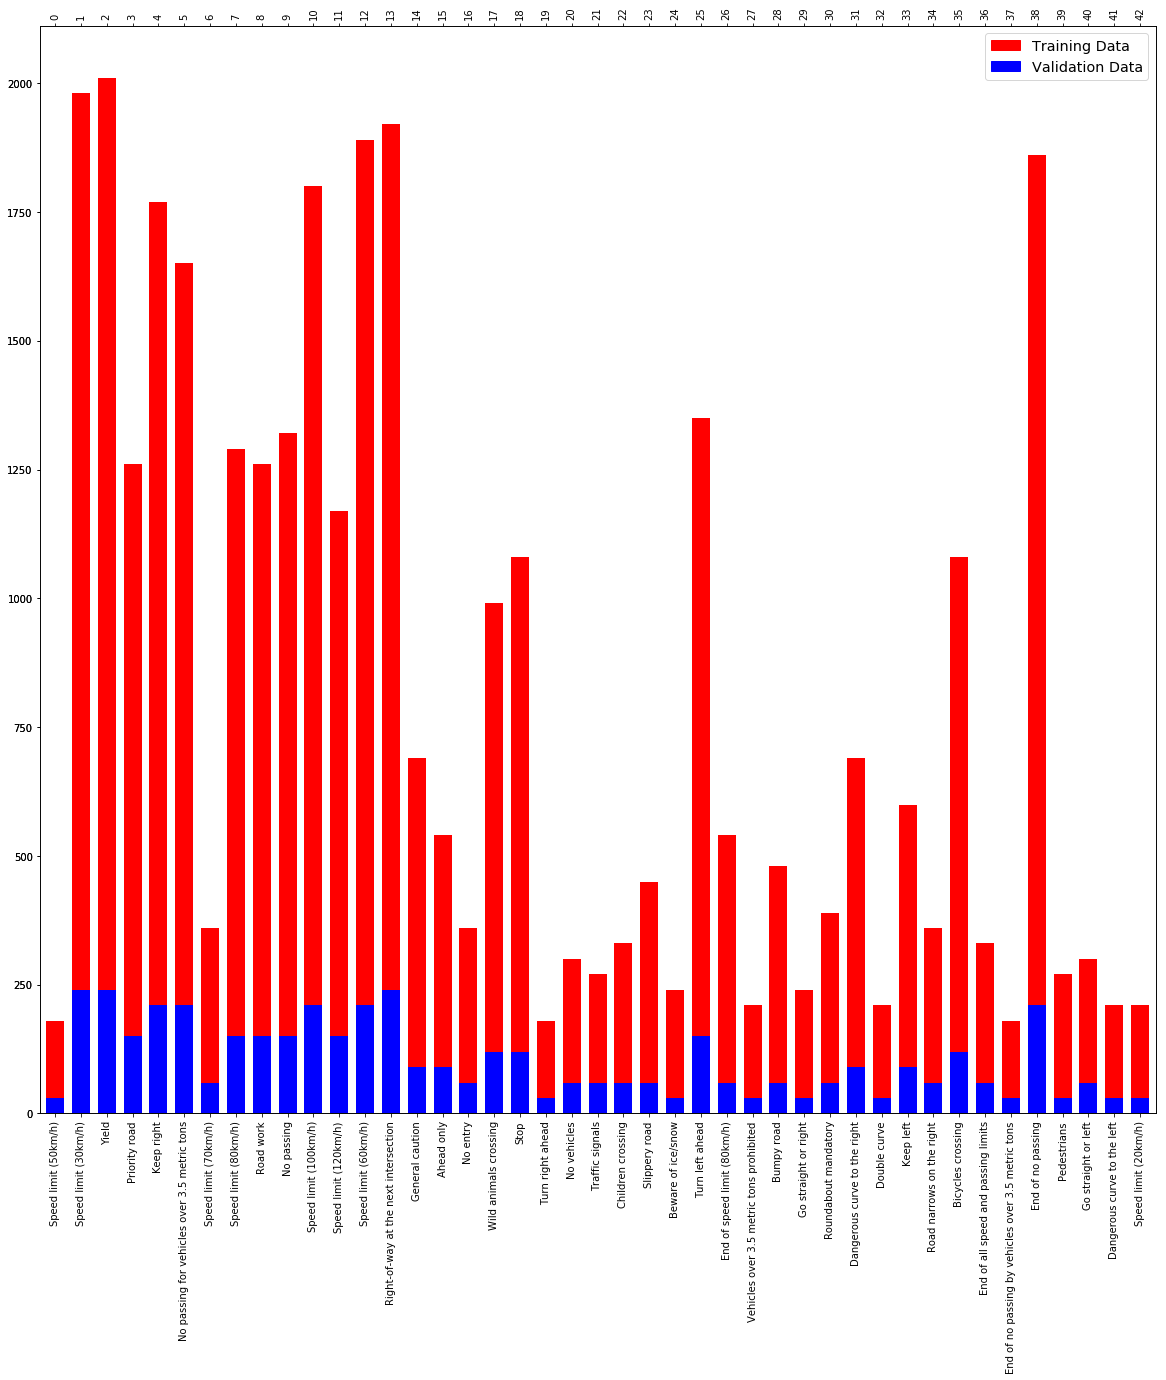

In [11]:
fig = plt.figure(figsize=(20,20))

train_chart = fig.add_subplot(111)
valid_chart = train_chart.twiny()

width = 0.7

train_handle = y_train_df['label'].value_counts().sort_index().plot(kind='bar', color='red', 
                                                     ax = train_chart, width = width)
valid_handle = y_valid_df['label'].value_counts().sort_index().plot(kind='bar', color='blue', 
                                                     ax = valid_chart, width = width)
train_chart.set_xticklabels(list(map(lambda x: label[x], y_train_df['label'].value_counts().index.tolist())), 
                            rotation = 'vertical') 

red_patch = mpatches.Patch(color='red', label='Training Data')
blue_patch = mpatches.Patch(color='blue', label='Validation Data')
plt.legend(handles=[red_patch, blue_patch],fontsize = 'x-large')

plt.show()

The difference in the amount of images between each label is obvious and the trend is the same in both sets (training and validation) it seems that the split is done with care to this. For the next step we need to take into account that this distribution will affect generalization of the model. Therefore we either have to augment the training dataset as some papers suggest or we use other techniques like spatial transformers to enhance generalization. Since data augmentation is rather straight-forward process I will proceed in using the spatial transformer networks as they are described in this [paper](https://arxiv.org/abs/1506.02025v3). Further description may be found below.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
### Import the necessary libraries
from skimage import exposure
import os
import warnings
from tqdm import tqdm
import cv2

#### Normalize Data

We tried different implementation regarding normalization during the investigation of the dataset. After many attempts on network training the changing to YUV colormap with global contrast normalization across Y channel as it is described on this [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) gave the best results. The user can try and normalize with the different functions by changing the argument `norm_ftype` on calling the `normalize` function.

#### Normalize helper functions

All the helper functions used in the exercise during investigation

In [13]:
def adapt_hist(image_data):
    """
    Normalize images using built in equalize_adapthist function
    """
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) 
                         for image in tqdm(image_data)])
    
def clahe(image_data):
    """
    Normalize images using CLAHE algorithm of openCV
    """
    clahe = cv2.createCLAHE(clipLimit=0.0003, tileGridSize=(32,32))
    if image_data.ndim < 4:
         return np.array([clahe.apply(img) for img in tqdm(image_data)])
    else:
        gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in 
                                       image_data])
        return np.array([clahe.apply(img) for img in tqdm(gray)])
    
def simple_norm(image_data):
    """
    Simple normalization of pixels
    """
    image_data = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in 
                                       image_data])
    image_data = [((img - np.mean(img)) / np.std(img)) for img in image_data]
    
    
    return image_data

def yuv_ynorm_globalcontr(image_data, s=1, lamda=10, epsilon=0.000000001):
    """
    Change the color map to YUV and normalize using global contrast normalization
    across Y channel according tohttp://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
    """
    conv_images = []
    image_data = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2YUV) for img in image_data])
    for img in image_data:
        y = img[:,:,0]
        u = img[:,:,1]
        v = img[:,:,2]
        
        y = (y - np.mean(y))
        contrast = np.sqrt(lamda + np.mean(y**2))
        
        y = s * y / max(contrast, epsilon) 
        
        conv_images.append(y)
        
    return conv_images

def yuv_ynorm_image(image_data):
    """
    Change the colormap to YUV and normalize across Y channel according to
    http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
    """
    conv_images = []
    image_data = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2YUV) for img in image_data])
    for img in image_data:
        y = img[:,:,0]
        u = img[:,:,1]
        v = img[:,:,2]
        
        y = (y - np.mean(y)) / np.std(y)
        conv_images.append(np.stack((y, u, v), axis=2))
    return conv_images

def normalize(features, norm_ftype):
    data = {}
    print("\nNormalizing Set...")
    exec("data['features'] = "+norm_ftype+'(features)')   
    return np.array(data['features'])    

#### Create the file names

The train file is split as it couldn't be processed as a whole on the test PC with 16GB RAM. A workaround indicated on the internet for pickle files, is to split them into smaller ones. The `normalization` flag is used to enforce normalization even if the files already exist in the system.

In [14]:
norm_training_file1  = './data/train_norm1.p'
norm_training_file2  = './data/train_norm2.p'
norm_validation_file = './data/valid_norm.p'
norm_testing_file    = './data/test_norm.p'

norm_type = 'yuv_ynorm_globalcontr'
normalization = False

#### Normalize and save the dataset

In [15]:
if not os.path.isfile(norm_training_file1) or not os.path.isfile(norm_training_file2) or normalization:
    #X_train, y_train = load_data(resized_training_file)
    X_train1, X_train2 = np.array_split(X_train, 2)
    y_train1, y_train2 = np.array_split(y_train, 2)
    X_train_norm1 = normalize(X_train1, norm_type)
    save_data(norm_training_file1, X_train_norm1, y_train1)
    X_train_norm2 = normalize(X_train2, norm_type)
    save_data(norm_training_file2, X_train_norm2, y_train2)
    
if not os.path.isfile(norm_validation_file) or normalization:
    #X_valid, y_valid = load_data(resized_validation_file)
    X_valid_norm = normalize(X_valid, norm_type)
    save_data(norm_validation_file, X_valid_norm, y_valid)
    
if not os.path.isfile(norm_testing_file) or normalization:
    #X_test, y_test   = load_data(resized_testing_file)
    X_test_norm = normalize(X_test,  norm_type)
    save_data(norm_testing_file, X_test_norm, y_test)
    

#### Checkpoint: Load normalized images from files

Another checkpoint as we load now to our `X` and `y` variables the **normalized** data.

In [16]:
X_train1, y_train1 = load_data(norm_training_file1)
X_train2, y_train2 = load_data(norm_training_file2)

y_train = np.append(y_train1, y_train2)

X_train = np.append(X_train1, X_train2, axis=0)

X_valid, y_valid = load_data(norm_validation_file)
X_test, y_test   = load_data(norm_testing_file)

#### Show normalized images

Again make sure that everything is O.K.

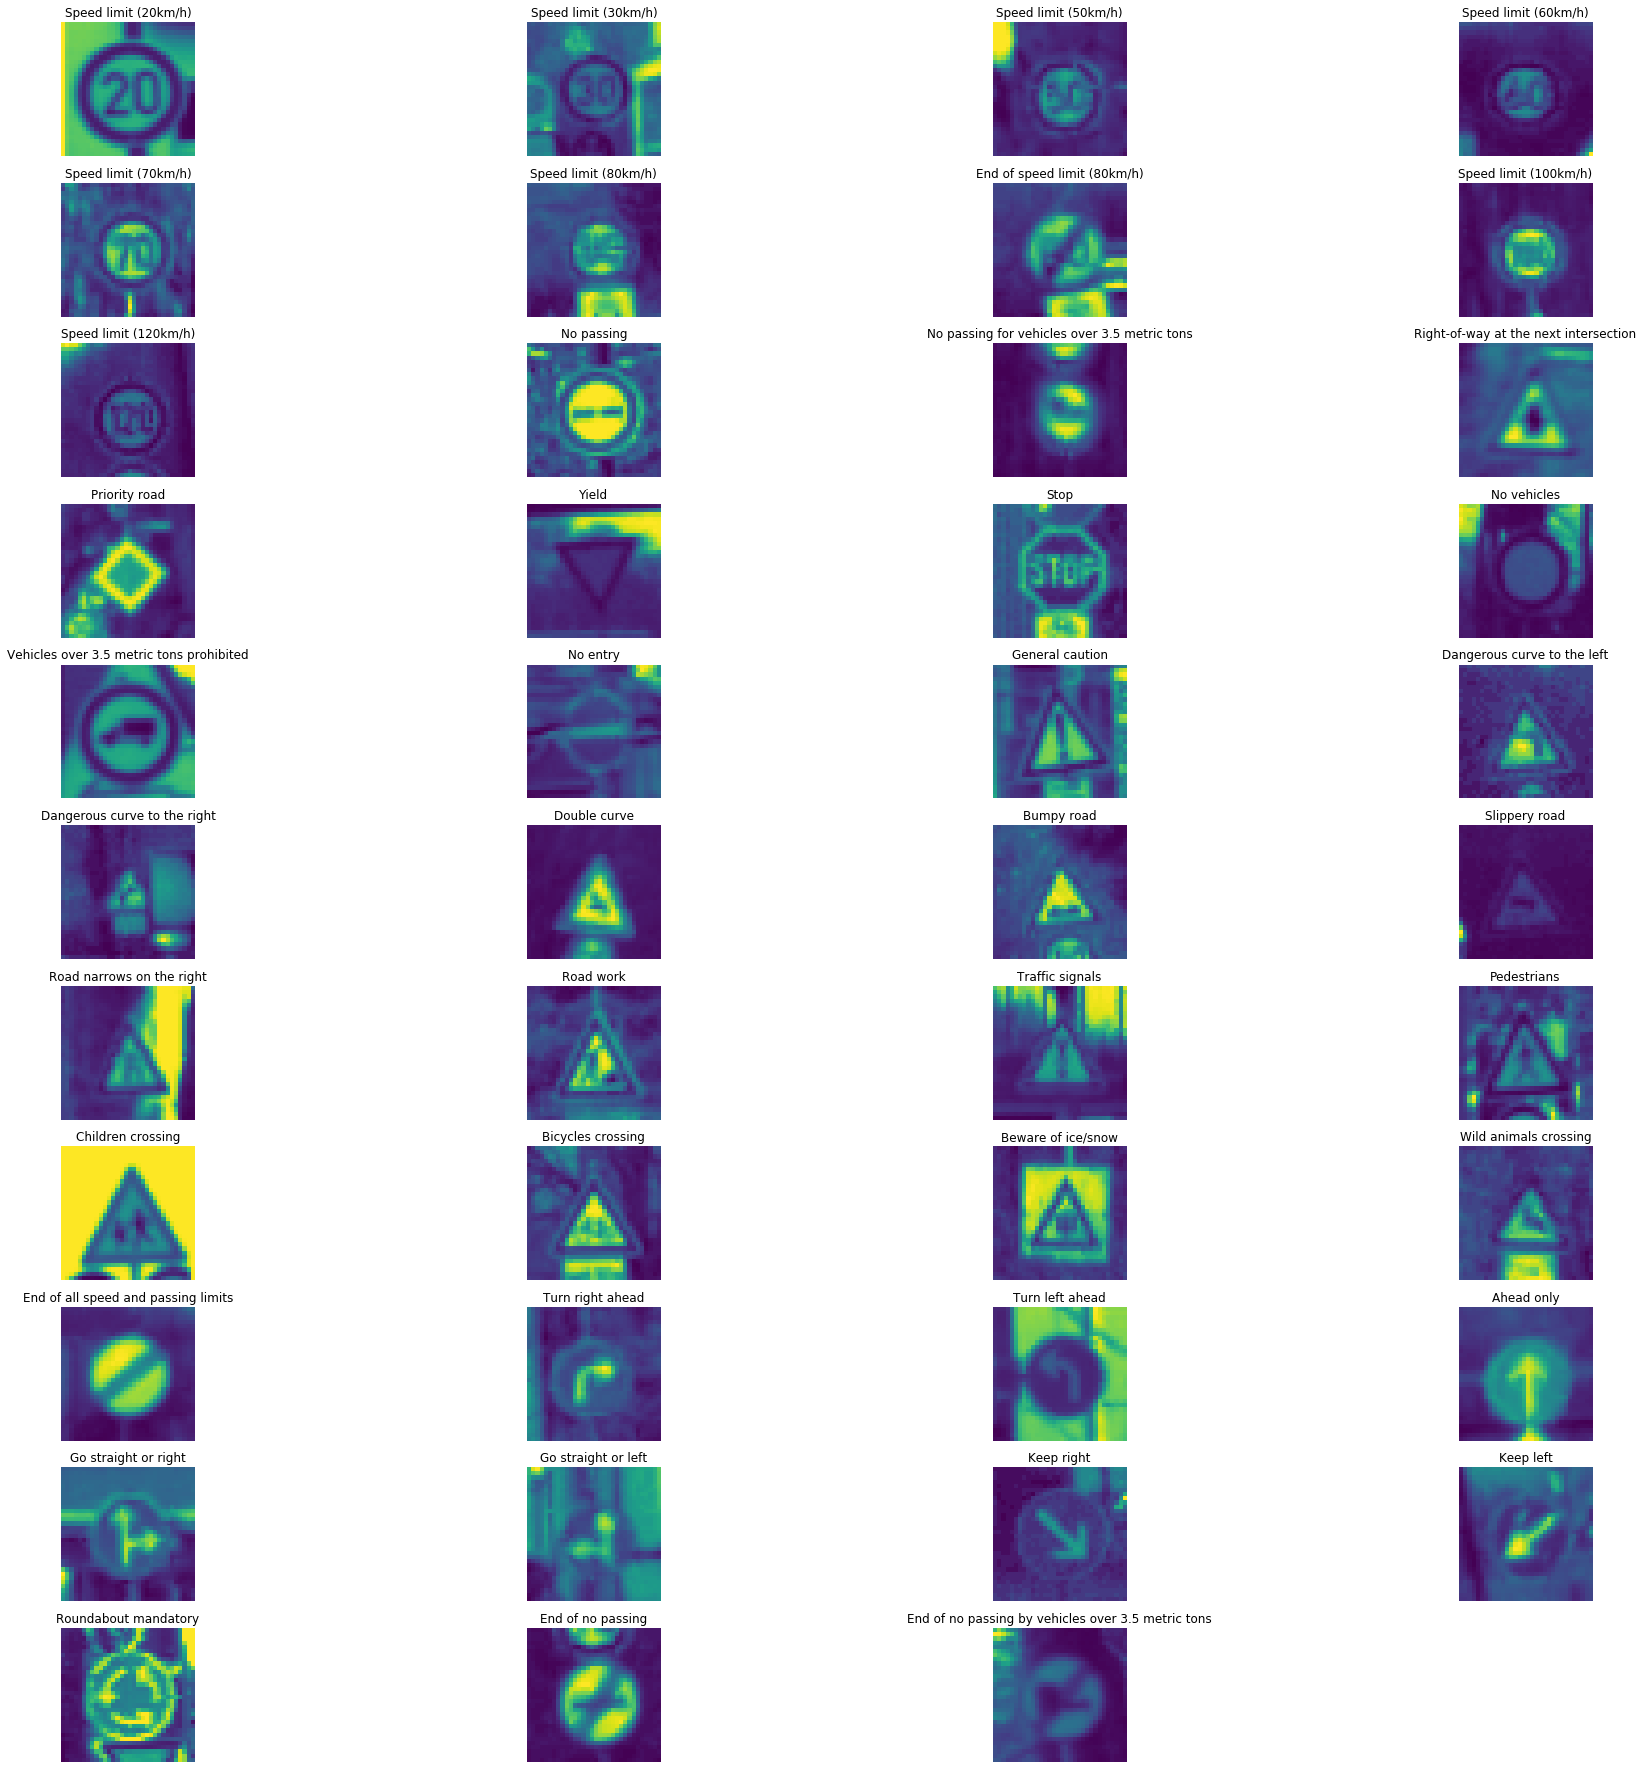

In [17]:
show_images(X_train, y_train)

### Model Architecture

The Model architecture is mostly inspired by [Haloi's paper](https://arxiv.org/pdf/1511.02992.pdf), with some differentiation e.g in preprocessing method. We use the same number of Spatial Transformers and the inception network as it is described on the paper. The model and the layers can be found on the link. We used the [ST implementation](https://github.com/tensorflow/models/blob/master/research/transformer/spatial_transformer.py) found in Tensorflow models. The  localization networks as well as the inception layers are built below.

#### Import libraries

In [61]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten, batch_norm
from spatial_transformer import transformer #from Tensorflow models
from sklearn.utils import shuffle 

#### Reshape datasets

It is important to reshape them so we have a 4D arrays. The **channel number** shall be changed from 3 to 1 if a normalization using grayscale is used

In [62]:
X_train = X_train.reshape([-1, 32, 32, 1])
X_valid = X_valid.reshape([-1, 32, 32, 1])
X_test  = X_test.reshape([-1, 32,  32, 1])

#### Import weight shapes

For the sake of keeping the notebook clean the initialized shapes of all weights and biases are kept in python scripts which are loaded below

In [63]:
%run -i -n inception_W_shapes.py
%run -i -n inception_b_shapes.py
%run -i -n loc_W_shapes.py
%run -i -n loc_b_shapes.py

#### Helper Functions

Below all the functions are defined that help in building the neural network

##### Fundamental

Here are the fundamental functions that are used. Implementation for convolutions with or w/o activation maxpooling and linear multiplications. They will be used to build the more complex part of the network.

In [64]:
def conv2d(x, W_shape, b_shape, stride=1, padding='SAME'):
    """
    Apply convolution with given W and b shapes
    """
    #Get Variables
    W = tf.get_variable("Wc", shape=W_shape, 
                        initializer=tf.truncated_normal_initializer(mean=0, stddev=0.1))
    b = tf.get_variable("bc", shape=b_shape, 
                        initializer=tf.constant_initializer(0.0))
    conv = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding=padding)
    conv = tf.nn.bias_add(conv, b)
    
    return conv

def conv2d_relu(x, W_shape, b_shape, stride=1, padding='SAME'):
    """
    Apply convolution, batch normalization and RELU activation
    """
    conv = batch_norm(conv2d(x, W_shape, b_shape, stride, padding),decay=0.9, zero_debias_moving_mean=True)
    return tf.nn.relu(conv)
    

def maxpool2d(x, k=2, stride=2, padding='VALID'):
    """
    Apply maxpooling with givven filter and stride
    """
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, stride, stride, 1],
                         padding=padding)

def linear_logits(x, W_shape, b_shape):
    """
    Apply linear multiplication
    """
    #Get Variables
    W = tf.get_variable("Wlog", shape=W_shape, 
                        initializer=tf.truncated_normal_initializer(mean=0, stddev=0.1))
    b = tf.get_variable("blog", shape=b_shape,
                        initializer=tf.constant_initializer(0.0))
    linear = tf.add(tf.matmul(x, W), b)
    return linear

def linear_relu(x, W_shape, b_shape):
    """
    Apply linear multiplication and RELU activation
    """
    linear = batch_norm(linear_logits(x, W_shape, b_shape), decay=0.9, zero_debias_moving_mean=True)
    return tf.nn.relu(linear)

def loc_logits(x, W_shape, b_shape):
    """
    Linear multiplication for localization network last layer.
    Theta 3x3 and initialized to identity """
    initial = np.array([[1.0, 0, 0], [0, 1.0, 0]])
    initial = initial.astype('float32')
    initial = initial.flatten()
    
    W = tf.get_variable("Wlog", shape=W_shape, initializer=tf.zeros_initializer())
    b = tf.get_variable("blog", shape=b_shape, initializer=tf.constant_initializer(initial))
    
    return tf.add(tf.matmul(x, W), b)
    

##### Localisation Networks

The localization net architectures used for the Spatial Transformers. We implemented 3 different networks as they are roughly described on the paper

In [103]:
def locNet1(x, W, b, name='loc1'):
    """
    Localization network 1
    """
    with tf.variable_scope(name+'_conv1'):
        pool1 = conv2d_relu(x, W['wc1'], b['bc1'], stride=2, padding='SAME')    
        pool1 = maxpool2d(pool1, k=2, stride=2, padding='SAME')
    with tf.variable_scope(name+'_conv2'):
        pool2 = conv2d_relu(pool1, W['wc2'], b['bc2'], stride=2, padding='SAME')
        pool2 = maxpool2d(pool2, k=2, stride=2, padding='SAME')    
    with tf.variable_scope(name+'_fc1'):
        f0 = flatten(pool2)
        f1 = tf.nn.dropout(linear_relu(f0, W['wd1'], b['bd1']), loc_fc1_keepprob)
        
    with tf.variable_scope(name+'_fc2'):
        f2 = tf.nn.dropout(linear_relu(f1, W['wd2'], b['bd2']), loc_fc2_keepprob)
        
    with tf.variable_scope(name+'_out'):
        out = loc_logits(f2, W['out'], b['out'])   
    return out

def locNet2(x, W, b, name='loc2'):
    """
    Localization network 2
    """
    with tf.variable_scope(name+'_conv1'):
        pool1 = conv2d_relu(x, W['wc1'], b['bc1'], stride=2, padding='SAME')    
        pool1 = maxpool2d(pool1, k=2, stride=2, padding='SAME')
    with tf.variable_scope(name+'_conv2'):
        pool2 = conv2d_relu(pool1, W['wc2'], b['bc2'], stride=2, padding='SAME')
    with tf.variable_scope(name+'_fc1'):
        f0 = flatten(pool2)
        f1 = tf.nn.dropout(linear_relu(f0, W['wd1'], b['bd1']), loc_fc1_keepprob)
        
    with tf.variable_scope(name+'_fc2'):
        f2 = tf.nn.dropout(linear_relu(f1, W['wd2'], b['bd2']), loc_fc2_keepprob)
        
    with tf.variable_scope(name+'_out'):
        out = loc_logits(f2, W['out'], b['out'])   
    return out

def locNet3(x, W, b, name='loc3'):
    """
    Localization network 3
    """
    with tf.variable_scope(name+'_conv1'):
        pool1 = conv2d_relu(x, W['wc1'], b['bc1'], stride=2, padding='SAME')    
    with tf.variable_scope(name+'_conv2'):
        pool2 = conv2d_relu(pool1, W['wc2'], b['bc2'], stride=1, padding='SAME')
        pool2 = maxpool2d(pool2, k=2, stride=2, padding='SAME')    
    with tf.variable_scope(name+'_fc1'):
        f0 = flatten(pool2)
        f1 = tf.nn.dropout(linear_relu(f0, W['wd1'], b['bd1']), loc_fc1_keepprob)
        
    with tf.variable_scope(name+'_fc2'):
        f2 = tf.nn.dropout(linear_relu(f1, W['wd2'], b['bd2']), loc_fc2_keepprob)
        
    with tf.variable_scope(name+'_out'):
        out = loc_logits(f2, W['out'], b['out'])   
    return out

#### Spatial Transformers

In [104]:
def st1(x, W_shape, b_shape, out_dims):
    """
    Spatial Transformer 1
    """
    theta = locNet1(x, W_shape, b_shape, name='loc1')
    x_t = transformer(x, theta, out_dims)
    return x_t, theta

def st2(x, W_shape, b_shape, out_dims):
    """
    Spatial Transformer 2
    """
    theta = locNet2(x, W_shape, b_shape, name='loc2')
    x_t = transformer(x, theta, out_dims)
    return x_t, theta

def st3(x, W_shape, b_shape, out_dims):
    """
    Spatial Transformer 3
    """
    theta = locNet3(x, W_shape, b_shape, name='loc3a')
    x_t = transformer(x, theta, out_dims)
    return x_t, theta

def st4(x, W_shape, b_shape, out_dims):
    """
    Spatial Transformer 4
    """
    theta = locNet3(x, W_shape, b_shape, name='loc3b')
    x_t = transformer(x, theta, out_dims)
    return x_t, theta

##### Inception

The implementation of inception network. The main function builds up the inception and the function below each stage of the inception network

In [105]:
def inception(x, W, b, name='inception'):
    """
    The basis implementation of the inception layer
    """
    
    # Convolution 1x1 
    with tf.variable_scope(name+'_conv1x1'):
        conv1x1 = conv2d_relu(x, W['w1x1'], b['b1x1'], stride=1, padding='SAME')
        tf.nn.dropout(conv1x1, inception_int_keepprob)
    # Layer 2: Convolution 1x1 and 3x3 
    with tf.variable_scope(name+'_conv3x3red'):
        conv3x3red = conv2d_relu(x, W['w3x3red'], b['b3x3red'], stride=1, padding='SAME')
    with tf.variable_scope(name+'_con3x3'):
        conv3x3 = conv2d_relu(conv3x3red, W['w3x3'], b['b3x3'], stride=1, padding='SAME')
        tf.nn.dropout(conv3x3, inception_int_keepprob)
    # Layer 3: Convolution 1x1 and 5x5
    with tf.variable_scope(name+'_conv5x5red'):
        conv5x5red = conv2d_relu(x, W['w5x5red'], b['b5x5red'], stride=1, padding='SAME')
    with tf.variable_scope(name+'_conv5x5'):
        conv5x5 = conv2d_relu(conv5x5red, W['w5x5'], b['b5x5'], stride=1, padding='SAME')
        tf.nn.dropout(conv5x5, inception_int_keepprob)
    # Layer 4: Convolution 1x1, 3x3 and Max Pooling 3x3
    with tf.variable_scope(name+'_pool3x3red'):
        conv3x3redp = conv2d_relu(x, W['w3x3redp'], b['b3x3redp'], stride=1, padding='SAME')
    with tf.variable_scope(name+'_pool3x3'):
        conv3x3p = conv2d_relu(conv3x3redp, W['w3x3p'], b['b3x3p'], stride=1, padding='SAME')    
        max3x3 = maxpool2d(conv3x3p, k=3, stride=1, padding='SAME')
        tf.nn.dropout(max3x3, inception_int_keepprob)
    # Filter Concatenation
    output = tf.concat([conv1x1, conv3x3, conv5x5, max3x3], 3)
    
    return output

In [106]:
def inception3(x):
    """
    TODO: Add description
    """
    # Inception Layer 3a: Input = 16x16x192, Output = 16x16x288
    with tf.name_scope('inception3a'):
        inception3a = inception(x, inceptNet3a_W, inceptNet3a_b, name='inception3a')
        
    with tf.name_scope('stn4'):
        inception3a_t, theta = st4(inception3a, locNet4_W, locNet4_b, (16, 16))
    
    # Inception Layer 3b: Input = 16x16x288, Output = 16x16x480
    with tf.name_scope('inception3b'):
        inception3b = inception(inception3a_t, inceptNet3b_W, inceptNet3b_b, name='inception3b')
    return tf.nn.dropout(inception3b,inception_keepprob), inception3a_t, theta

def inception4(x):
    """
    TODO: Add description
    """
    # Inception 4a: Input = 8x8x480, Output = 8x8x512 
    with tf.name_scope('inception4a'):
        inception4a = inception(x, inceptNet3_W, inceptNet3_b, name='inception4a')
    # Inception 4b: Input = 8x8x512, Output = 8x8x512 (4b)
    with tf.name_scope('inception4b'):
        inception4b = inception(inception4a, inceptNet4_W, inceptNet4_b, name='inception4b')
    # Inception 4c: Input = 8x8x512, Output = 8x8x512 (4c)
    with tf.name_scope('inception4c'):
        inception4c = inception(inception4b, inceptNet5_W, inceptNet5_b, name='inception4c')
    # Inception 4d: Input = 8x8x512, Output = 8x8x528 (4d)
    with tf.name_scope('inception4d'):
        inception4d = inception(inception4c, inceptNet6_W, inceptNet6_b, name='inception4d')
    # Inception 4e: Input = 8x8x528, Output = 8x8x832 (4e)
    with tf.name_scope('inception4e'):
        inception4e = inception(inception4d, inceptNet7_W, inceptNet7_b, name='inception4e')
    return tf.nn.dropout(inception4e,inception_keepprob)

def inception5(x):
    """
    TODO: Add description
    """
    # Inception 5a: Input = 4x4x832, Output = 4x4x832 (5a)
    with tf.name_scope('inception5a'):
        inception5a = inception(x, inceptNet8_W, inceptNet8_b, name='inception5a')
    # Inception 5b: Input = 4x4x832, Output = 4x4x1024 (5b)
    with tf.name_scope('inception5b'):
        inception5b = inception(inception5a, inceptNet9_W, inceptNet9_b, name='inception5b')
    return tf.nn.dropout(inception5b,inception_keepprob)

#### Main Network

The main network using the STs inception and the extra convolution maxpooling and full layers.

In [107]:
Net_W = {
    'wc1': [5, 5, 1, 64],
    'wc2': [3, 3, 64, 192],
    'wd1': [1*1*1024, n_classes],
}
Net_b = {
    'bc1': [Net_W['wc1'][3]],
    'bc2': [Net_W['wc2'][3]],
    'bd1': [Net_W['wd1'][1]],
}

def Net(x):
    """
    Complete neural net buildup
    """
    with tf.name_scope('local_norm'):
        x_norm = tf.nn.lrn(x, depth_radius=5, bias=2, alpha=0.0001, beta=0.75)
    
    # Spatial Transformation
    with tf.name_scope('stn1'):
        x_t, theta1 = st1(x_norm, locNet1_W, locNet1_b, (128, 128))

    # Layer 1: Convolutional. Input = 128x128xC, Output = 64x64x64.
    with tf.variable_scope('conv1'):
        conv1 = conv2d_relu(x_t, Net_W['wc1'], Net_b['bc1'], stride=2, padding='SAME')
   
    # Pooling. Input = 64x64x64, Output = 32x32x64.
    conv1 = maxpool2d(conv1, k=3, stride=2, padding='SAME')
    
    #with tf.name_scope('stn2'):
    #    conv1_t, theta2 = st2(conv1, locNet2_W, locNet2_b, (32, 32))
    
    # Layer 2: Convolutional. Input = 32x32x64, Output = 32x32x192.
    with tf.variable_scope('conv2'):
        conv2 = conv2d_relu(conv1, Net_W['wc2'], Net_b['bc2'], stride=1, padding='SAME')
        
    # Pooling. Input = 32x32x192. Output = 16x16x192.
    conv2 = maxpool2d(conv2, k=3, stride=2, padding='SAME')
    
    with tf.name_scope('stn3'):
        conv2_t, theta2 = st3(conv2, locNet3_W, locNet3_b, (16, 16))
    
    inceptionL3, inception3a_t, theta3 = inception3(conv2_t)
    
    inceptionL3 = maxpool2d(inceptionL3, k=3, stride=2)

    inceptionL4 = inception4(inceptionL3)
    
    # Pooling: Input = 8x8x832, Output = 4x4x832 
    net = maxpool2d(inceptionL4, k=3, stride=2, padding='SAME')

    inceptionL5 = inception5(net)
    
    # Pooling: Input = 4x4x1024, Output = 1x1x1024
    avg_pool = tf.nn.avg_pool(inceptionL5, ksize=[1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    
    # Dropout: Input = 1x1x1024, Output = 1x1x1024
    drop_out = tf.nn.dropout(avg_pool, fc1_keepprob)
    
    # Flatten. Input = 1x1x1024. Output = 1024.
    f0 = flatten(drop_out)
                                  
    # Fully Connected. Input = 1024. Output = 43.
    with tf.variable_scope('logits'):
        logits = linear_logits(f0, Net_W['wd1'], Net_b['bd1'])
    
    return logits, x_t, theta1, conv1, conv2, conv2_t, theta2, inceptionL3, inception3a_t, theta3, inceptionL4, inceptionL5, f0

#### Loss Function

In [108]:
def calc_loss(logits, one_hot_y):
    with tf.name_scope('Predictions'):
        predictions = tf.nn.softmax(logits)
    with tf.name_scope('Cross_Entropy'):
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
    with tf.name_scope('Loss'):
        loss_operation = tf.reduce_mean(cross_entropy)
    return loss_operation
    

#### Network configuration

Image shape, batch size, epochs and learning rate are configured here

In [109]:
CONFIG = {
    'H' : 32,
    'W' : 32,
    'C' : 1,
    'batch_size' : 20,
    'EPOCHS' :100,
    'lr' : 0.00032
    
}

In [110]:
# Clear the graph
tf.reset_default_graph()

#### Features and Labels
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [111]:
with tf.name_scope('batch'):
    x = tf.placeholder(tf.float32, (None, CONFIG['H'], CONFIG['W'], CONFIG['C']), name='InputImages')
    y = tf.placeholder(tf.int32, (None), name='InputLabels')
    one_hot_y = tf.one_hot(y, n_classes, name='InputLabelsOneHot')

#### Dropout Placeholders

In [112]:
with tf.name_scope('dropout'):
    loc_fc1_keepprob = tf.placeholder(tf.float32, name='loc_fc1_do')
    loc_fc2_keepprob = tf.placeholder(tf.float32, name='loc_fc2_do')
    inception_keepprob = tf.placeholder(tf.float32, name='inception_do')
    fc1_keepprob = tf.placeholder(tf.float32, name='fc1_do')
    inception_int_keepprob = tf.placeholder(tf.float32, name='inception_int_do')

#### Initialize Net

In [113]:
with tf.name_scope('logits'):
    logits, x_t, theta1, conv1, conv2, conv2_t, theta2, inceptionL3, inception3a_t, theta3, inceptionL4, inceptionL5, f0 = Net(x)

#### Prediction and Accuracy

In [114]:
with tf.name_scope('correct_prediction'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) 
    corr_pred_numval = tf.cast(correct_prediction, tf.float32)
    
with tf.name_scope('accuracy'):
    accuracy_operation = tf.reduce_mean(corr_pred_numval)

#### Loss Operation

In [115]:
with tf.name_scope('calc_loss'):
    loss_operation = calc_loss(logits, one_hot_y)

#### Learning Rate

In [116]:
starter_rate = tf.placeholder(tf.float32, name='lr')
global_step = tf.Variable(0, trainable=False, name='g_step')
steps = round(len(X_train) / CONFIG['batch_size'])
bounds = [round(30*steps), round(50*steps), round(70*steps), 
          round(85*steps),round(95*steps)]
values = [0.00032, 0.00015, 0.00010, 0.00007, 0.000035, 0.000015]
learning_rate = tf.train.piecewise_constant(global_step, bounds, values)

#### Optimization

In [117]:
with tf.name_scope('optimizer'):
#    optimizer = tf.train.RMSPropOptimizer(learning_rate = learning_rate, 
#                                          decay=0.0918, momentum=0.9)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

#### Backpropagation

In [118]:
with tf.name_scope('backpropagation'):
    training_operation = optimizer.minimize(loss_operation, global_step=global_step)

D:\Applications\Anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [119]:
EPOCHS = CONFIG['EPOCHS']
BATCH_SIZE = CONFIG['batch_size']

#### Model Evaluation

In [120]:
def evaluate(X_data, y_data, batch_size=1280):
    """
    Helper function to evaluate the network on given data
    """
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = []
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        
        batch_accuracy, batch_loss = sess.run([accuracy_operation, loss_operation], 
                                              feed_dict={x: batch_x, 
                                                         y: batch_y,
                                                         loc_fc1_keepprob: 1.0,
                                                         loc_fc2_keepprob: 1.0,
                                                         inception_keepprob: 1.0,
                                                         fc1_keepprob: 1.0,
                                                         inception_int_keepprob: 1.0
                                                        })
        
        total_accuracy += (batch_accuracy * len(batch_x))
        total_loss.append(batch_loss)
        
    return total_accuracy / num_examples, np.average(total_loss)

In [121]:
def checking(X_train, y_train, X_valid, y_valid, batch, train_sum, valid_sum):
    """
    Helper function to check information during training
    """
    x_train_batch, y_train_batch = shuffle(X_train, y_train)
    x_train_batch, y_train_batch = x_train_batch[:BATCH_SIZE], y_train_batch[:BATCH_SIZE]
    
    #Evaluate validation data:
    accuracy, loss = evaluate(X_valid, y_valid)
    
    #Run for only one batch from training set
    b_train_acc, summary = sess.run([accuracy_operation, summary_op],
                                 feed_dict={
                                     x: x_train_batch,
                                     y: y_train_batch, 
                                     loc_fc1_keepprob: 1.0,
                                     loc_fc2_keepprob: 1.0,
                                     inception_keepprob: 1.0,
                                     inception_int_keepprob: 1.0,
                                     fc1_keepprob: 1.0})
    train_sum.add_summary(summary, batch)
    
    # Compare on one batch from valid set
    x_valid_batch, y_valid_batch = shuffle(X_valid, y_valid)
    x_valid_batch, y_valid_batch = x_valid_batch[:BATCH_SIZE], y_valid_batch[:BATCH_SIZE]
    b_valid_acc, summary = sess.run([accuracy_operation, summary_op],
                                   feed_dict={
                                   x: x_valid_batch,
                                   y: y_valid_batch,
                                   loc_fc1_keepprob: 1.0,
                                   loc_fc2_keepprob: 1.0,
                                   inception_keepprob: 1.0,
                                   inception_int_keepprob: 1.0,
                                   fc1_keepprob: 1.0})
    valid_sum.add_summary(summary, batch)
    
    print("Batch {}: Val_Acc = {:.3f}, Val_Loss = {:.6f}, LR = {:.6f} Batch_Val_Acc = {:.3f}, Batch_Train_Acc = {:.3f}".
          format(batch, accuracy, loss, lr, b_valid_acc, b_train_acc))

#### Training Pipeline

The training is done here. The output is not visible but the user may find the best training of the model on the folder `model` provided in the repository.

In [122]:
tf.summary.scalar("loss", loss_operation)
tf.summary.scalar("accuracy", accuracy_operation)
summary_op = tf.summary.merge_all()

saver = tf.train.Saver(max_to_keep=3)

In [123]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_sum = tf.summary.FileWriter("./model/train", sess.graph)
    valid_sum = tf.summary.FileWriter("./model/valid", sess.graph)
    num_examples = len(X_train)
    val_acc = []
    val_acc.append(0)
    print("Training...")
    print()
    for i in range(EPOCHS):
        global_step = 0
        batch_no = 0
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss, lr = sess.run([training_operation, loss_operation, learning_rate],
                                   feed_dict={x: batch_x, 
                                              y: batch_y,
                                              loc_fc1_keepprob: 0.8,
                                              loc_fc2_keepprob: 0.7,
                                              inception_keepprob: 0.6,
                                              inception_int_keepprob: 1.0,
                                              fc1_keepprob: 0.4,
                                              starter_rate: CONFIG['lr']})
            if batch_no % 500 == 0:
                checking(X_train, y_train, X_valid, y_valid, batch_no, train_sum, valid_sum)                
            batch_no += 1
            
        train_accuracy, train_loss = evaluate(X_train, y_train)    
        valid_accuracy, valid_loss = evaluate(X_valid, y_valid)
        val_acc.append(valid_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("LR = {:.6f}".format(lr))
        print("Training Accuracy = {:.3f}, Train Loss = {:.6f}".
              format(train_accuracy, train_loss))
        print("Validation Accuracy = {:.3f}, Valid Loss = {:.6f}".
              format(valid_accuracy, valid_loss))
        print()
        if val_acc[-1] > val_acc[-2]:
            saver.save(sess, './model/Net_Epoch_{}_acc_{:.3f}'.format(i+1, val_acc[-1]))
            print("Model saved")
            print()
        else:
            del val_acc[-1]
    
    saver.save(sess, './model/Net_Epoch_{}_acc_{:.3f}'.format(i+1, valid_accuracy))
    print("Model saved - Last Epoch")
    print()

Training...

Batch 0: Val_Acc = 0.014, Val_Loss = 5.576971, LR = 0.000320 Batch_Val_Acc = 0.000, Batch_Train_Acc = 0.050
Batch 500: Val_Acc = 0.222, Val_Loss = 3.110905, LR = 0.000320 Batch_Val_Acc = 0.150, Batch_Train_Acc = 0.150
Batch 1000: Val_Acc = 0.348, Val_Loss = 2.459208, LR = 0.000320 Batch_Val_Acc = 0.400, Batch_Train_Acc = 0.450
Batch 1500: Val_Acc = 0.494, Val_Loss = 1.937129, LR = 0.000320 Batch_Val_Acc = 0.800, Batch_Train_Acc = 0.600
EPOCH 1 ...
LR = 0.000320
Training Accuracy = 0.759, Train Loss = 0.837955
Validation Accuracy = 0.565, Valid Loss = 1.944764

Model saved

Batch 0: Val_Acc = 0.566, Val_Loss = 1.938469, LR = 0.000320 Batch_Val_Acc = 0.500, Batch_Train_Acc = 0.800
Batch 500: Val_Acc = 0.703, Val_Loss = 1.358317, LR = 0.000320 Batch_Val_Acc = 0.850, Batch_Train_Acc = 0.950
Batch 1000: Val_Acc = 0.753, Val_Loss = 1.231360, LR = 0.000320 Batch_Val_Acc = 0.950, Batch_Train_Acc = 0.950
Batch 1500: Val_Acc = 0.814, Val_Loss = 0.832217, LR = 0.000320 Batch_Val_Acc 

Batch 1500: Val_Acc = 0.961, Val_Loss = 0.268830, LR = 0.000320 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
EPOCH 29 ...
LR = 0.000320
Training Accuracy = 0.997, Train Loss = 0.011435
Validation Accuracy = 0.959, Valid Loss = 0.285197

Batch 0: Val_Acc = 0.958, Val_Loss = 0.288499, LR = 0.000320 Batch_Val_Acc = 0.950, Batch_Train_Acc = 1.000
Batch 500: Val_Acc = 0.963, Val_Loss = 0.244806, LR = 0.000320 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 1000: Val_Acc = 0.969, Val_Loss = 0.250925, LR = 0.000320 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 1500: Val_Acc = 0.957, Val_Loss = 0.325643, LR = 0.000320 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
EPOCH 30 ...
LR = 0.000320
Training Accuracy = 0.999, Train Loss = 0.003317
Validation Accuracy = 0.965, Valid Loss = 0.278498

Batch 0: Val_Acc = 0.965, Val_Loss = 0.276974, LR = 0.000320 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 500: Val_Acc = 0.973, Val_Loss = 0.209982, LR = 0.000150 Batch_Val_Acc = 1.000,

Batch 500: Val_Acc = 0.980, Val_Loss = 0.190159, LR = 0.000100 Batch_Val_Acc = 0.950, Batch_Train_Acc = 1.000
Batch 1000: Val_Acc = 0.979, Val_Loss = 0.198847, LR = 0.000100 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 1500: Val_Acc = 0.983, Val_Loss = 0.161032, LR = 0.000100 Batch_Val_Acc = 0.950, Batch_Train_Acc = 1.000
EPOCH 58 ...
LR = 0.000100
Training Accuracy = 1.000, Train Loss = 0.000177
Validation Accuracy = 0.983, Valid Loss = 0.164880

Batch 0: Val_Acc = 0.983, Val_Loss = 0.164307, LR = 0.000100 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 500: Val_Acc = 0.979, Val_Loss = 0.206309, LR = 0.000100 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 1000: Val_Acc = 0.979, Val_Loss = 0.230071, LR = 0.000100 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 1500: Val_Acc = 0.980, Val_Loss = 0.193268, LR = 0.000100 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
EPOCH 59 ...
LR = 0.000100
Training Accuracy = 1.000, Train Loss = 0.000009
Validation Accuracy = 0.

Batch 0: Val_Acc = 0.985, Val_Loss = 0.088762, LR = 0.000035 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 500: Val_Acc = 0.986, Val_Loss = 0.075111, LR = 0.000035 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 1000: Val_Acc = 0.986, Val_Loss = 0.076116, LR = 0.000035 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 1500: Val_Acc = 0.987, Val_Loss = 0.076694, LR = 0.000035 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
EPOCH 87 ...
LR = 0.000035
Training Accuracy = 1.000, Train Loss = 0.000007
Validation Accuracy = 0.987, Valid Loss = 0.079219

Batch 0: Val_Acc = 0.987, Val_Loss = 0.079270, LR = 0.000035 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 500: Val_Acc = 0.988, Val_Loss = 0.084814, LR = 0.000035 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 1000: Val_Acc = 0.988, Val_Loss = 0.086883, LR = 0.000035 Batch_Val_Acc = 1.000, Batch_Train_Acc = 1.000
Batch 1500: Val_Acc = 0.988, Val_Loss = 0.079696, LR = 0.000035 Batch_Val_Acc = 1.000, Batch_Train_Acc 

#### Apply on Test Images

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model/'))
    test_accuracy = evaluate(X_test, y_test)[0]
    print("Test Accuracy = {:.2f}%".format(test_accuracy*100.0))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
import os, fnmatch

input_img_path = "./images/"
img_name_list = fnmatch.filter(os.listdir(input_img_path), '*.jpg')
img_list = []
images = np.array([np.array(plt.imread(os.path.join(input_img_path,name))) for name in img_name_list])

#### Prepare the labels of the list

In [ ]:
img_labels = np.array([11, 12, 14, 17, 18, 1, 22, 25, 28, 28, 29, 2, 35, 35, 36, 37, 38, 38, 38, 3, 41, 9], dtype=np.uint8)
 

#### Display images helper function

In [ ]:
def display_images(images, img_labels):
    """
    Given the images and the labes it displays the images
    """
    fig = plt.figure(figsize=(15,15))
    for i in range(len(images)):
        plt.subplot(len(images)//4+1,4,i+1)
        if images[i].ndim > 2:
            plt.imshow(images[i])
        else:
            plt.imshow(images[i], cmap = 'gray')
        plt.title(label[img_labels[i]])
        plt.axis('off')


In [ ]:
display_images(images, img_labels)

### Predict the Sign Type for Each Image

#### Preprocess the images

We use the same process of preprocessing as we did for the train dataset

In [ ]:
images = [cv2.resize(img, (128, 128), cv2.INTER_CUBIC) for img in images]
norm_imgs = normalize(features=images, norm_ftype=norm_type)

In [ ]:
display_images(norm_imgs, img_labels)

In [ ]:
norm_imgs = norm_imgs.reshape([-1, 128, 128, 3])

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model/'))
    test_accuracy = evaluate(norm_imgs, img_labels, batch_size=23)[0]
    print("Test Accuracy = {:.1f}%".format(test_accuracy*100.0))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model/'))
    out_logits = sess.run(tf.nn.softmax(logits), feed_dict={x: norm_imgs[0:len(norm_imgs)],
                                                            loc_fc1_keepprob: 1.0,
                                                            loc_fc2_keepprob: 1.0,
                                                            inception_keepprob: 1.0,
                                                            fc1_keepprob: 1.0,
                                                            inception_int_keepprob: 1.0
                                                            })
    top_prob, top_pred = sess.run(tf.nn.top_k(tf.constant(out_logits), k=5))               
        

In [ ]:
for i, (preds, probs, image) in enumerate(zip(top_pred, top_prob, images)):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    for pred, prob in zip(preds.astype(int), probs):
        sign_name = label[pred]
        print('{:>5}: {:<50} ({:>14.10f}%)'.format(pred, sign_name, prob*100.0))
    print("")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,
                                                            loc_fc1_keepprob: 1.0,
                                                            loc_fc2_keepprob: 1.0,
                                                            inception_keepprob: 1.0,
                                                            fc1_keepprob: 1.0,
                                                            inception_int_keepprob: 1.0})
    
    featuremaps = activation.shape[3]
    if featuremaps > 48:
        featuremaps = 48
    plt.figure(plt_num, figsize=(50,50))
    for featuremap in range(featuremaps):
        plt.subplot(featuremaps//4+1,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
img = norm_imgs[2]
img = img.reshape([-1,128,128,3])
sess = tf.InteractiveSession()
saver.restore(sess, tf.train.latest_checkpoint('./model/'))

#### ST1 Output

In [ ]:
outputFeatureMap(img, x_t)

#### ST2 output

In [ ]:
outputFeatureMap(img, conv1_t)

#### ST3 output

In [ ]:
outputFeatureMap(img, conv2_t)

#### Inception L3 output

In [ ]:
outputFeatureMap(img, inceptionL3)

#### Inception L4 output

In [ ]:
outputFeatureMap(img, inceptionL4)

#### Inception L5 output

In [ ]:
outputFeatureMap(img, inceptionL5)

In [ ]:
print(sess.run(theta3, feed_dict={x : img,
                                      loc_fc1_keepprob: 1.0,
                                      loc_fc2_keepprob: 1.0,
                                      inception_keepprob: 1.0,
                                      fc1_keepprob: 1.0,
                                      inception_int_keepprob: 1.0}))